In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

1. Load the dataset and conduct any necessary preprocessing, such as normalizing the data. 

In [3]:
# warning! slow code
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

<IPython.core.display.Javascript object>

In [4]:
indices = np.random.choice(70000, 10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


<IPython.core.display.Javascript object>

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

2. Apply PCA to the data and get the first two principal components.

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22269992, 0.36671616])

<IPython.core.display.Javascript object>

3. Using the first two principal components, draw a graph of the data by coloring and labeling the data points as you did in the checkpoint.

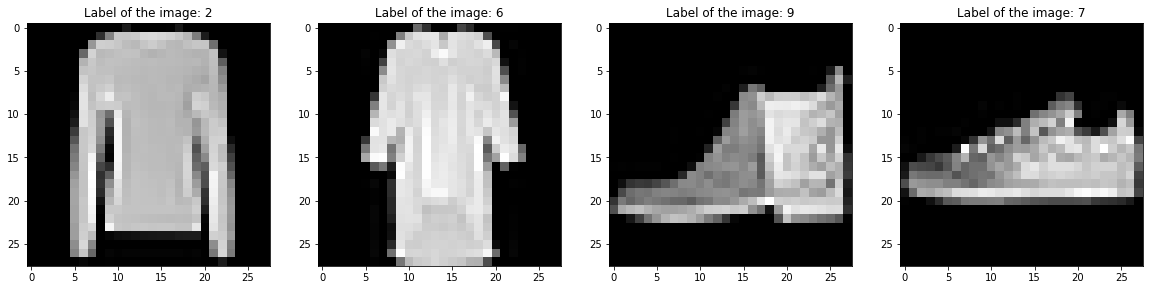

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(X[123].reshape(28, 28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28, 28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28, 28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[136].reshape(28, 28), cmap="gray")
plt.title("Label of the image: {}".format(y[136]))

plt.show()

This PCA solution retains a lot of information in the imgaes. General shapes can be determined, but it is unclear what some are trying to represent. Above we definitely see a shirt and pants in the first two images. However, It is unclear if the third is a dress or shirt, and the 4th may be a whole outfit or person. Without knowing the possible labels, it is is hard to say exactly what is meant to be shown. This solution probably isn't the best, as only 36% of the variance is contained in the first two principle components. 